In [16]:
import numpy as np
import os , sys
sys.path.append("..")

In [17]:
# ================================================================
#  Sanity - pattern and t-SNE on inverse-scaled results
# ================================================================
import numpy as np, matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# -------- helper to draw mean ± std signature -------------------
def plot_signature(xs, name):
    xs = np.asarray(xs)                      # (N,192,2)
    mean_x, std_x = xs[...,0].mean(0), xs[...,0].std(0)
    mean_y, std_y = xs[...,1].mean(0), xs[...,1].std(0)
    fig, ax = plt.subplots(1,2, figsize=(12,3))
    ax[0].plot(mean_x); ax[0].fill_between(range(192), mean_x-std_x, mean_x+std_x, alpha=.2)
    ax[0].set_title(f"{name} X mean±std")
    ax[1].plot(mean_y, color='orange'); ax[1].fill_between(range(192), mean_y-std_y, mean_y+std_y, alpha=.2,color='orange')
    ax[1].set_title(f"{name} Y mean±std")
    plt.tight_layout(); plt.show()
    

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot airfoils in a grid layout
def plot_airfoils_grid(xs_data, num_samples=15, rows=3, cols=5, title="Sample Airfoil Shapes"):
    num_samples = min(num_samples, len(xs_data))  # Ensure we don't exceed available airfoils
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 2.5))  # Adjust size dynamically
    fig.suptitle(title, fontsize=14, fontweight='bold')

    for i, ax in enumerate(axes.flat):  # Loop over subplots
        if i < num_samples:
            x_coords = xs_data[i, :, 0]  # Extract X coordinates
            y_coords = xs_data[i, :, 1]  # Extract Y coordinates
            ax.plot(x_coords, y_coords, color='blue', linewidth=1)
            ax.set_title(f"Airfoil {i}", fontsize=8)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlim(-0.1, 1.1)  # Normalize X range
            ax.set_ylim(-0.25, 0.25)  # Normalize Y range
        else:
            ax.axis('off')  # Hide extra subplots if not needed

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()



# Checking the generated shapes

## DDPM without dpp 499 epoch

xs_test.shape=(9701, 192, 2)
xs_train.shape=(38802, 192, 2)


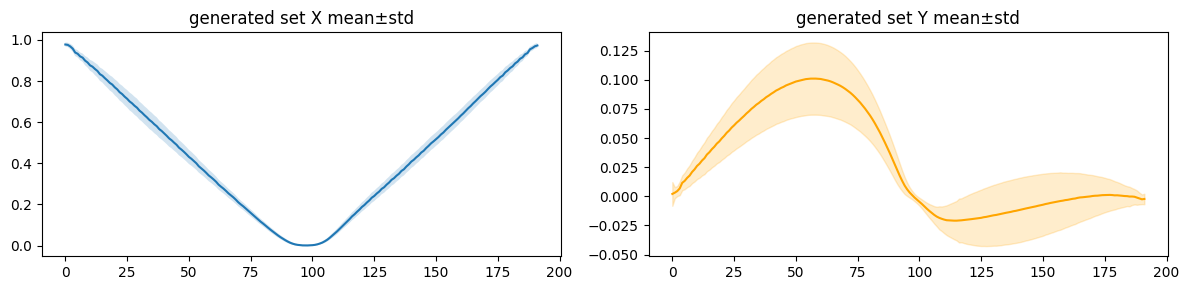

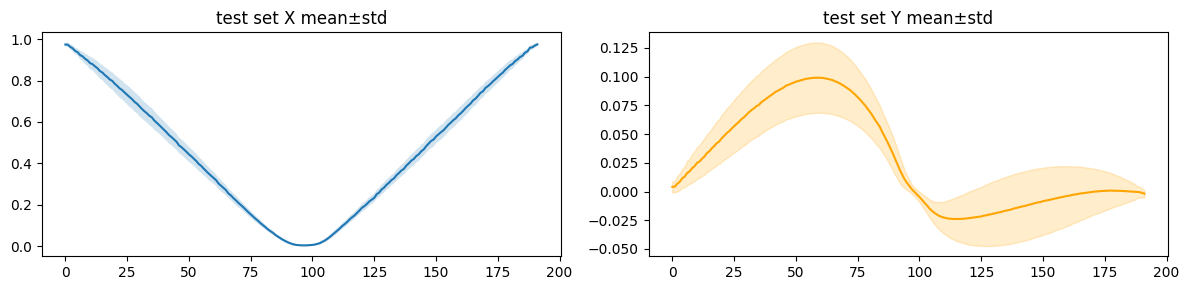

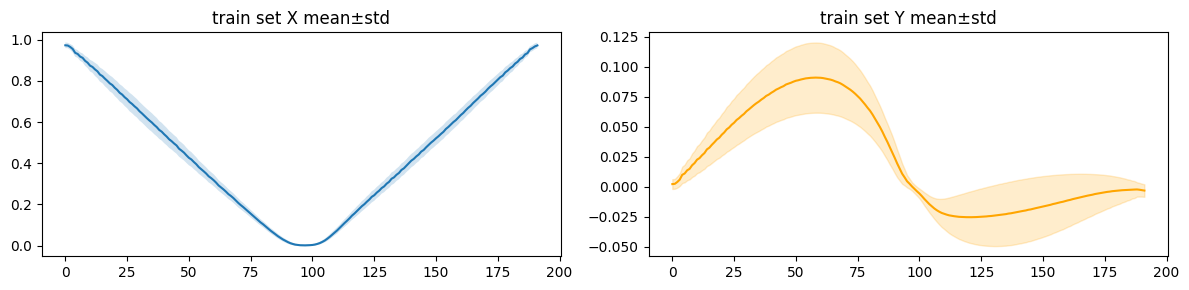

In [19]:
xs_test = np.load("/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data/raw/xs_test.npy")
xs_train = np.load("/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data/raw/xs_train.npy")
generated_real = np.load(rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/src/diffusion_notebooks/DIffusion_model_weigths_and_datas/model_epoch_499_RMSnorm_unscaled.pt/datas/generated_airfoils_RMS_fixed_auto_norm_false.npy")
print(f"{xs_test.shape=}")
print(f"{xs_train.shape=}")

plot_signature(generated_real, "generated set")
plot_signature(xs_test, "test set")
plot_signature(xs_train, "train set")

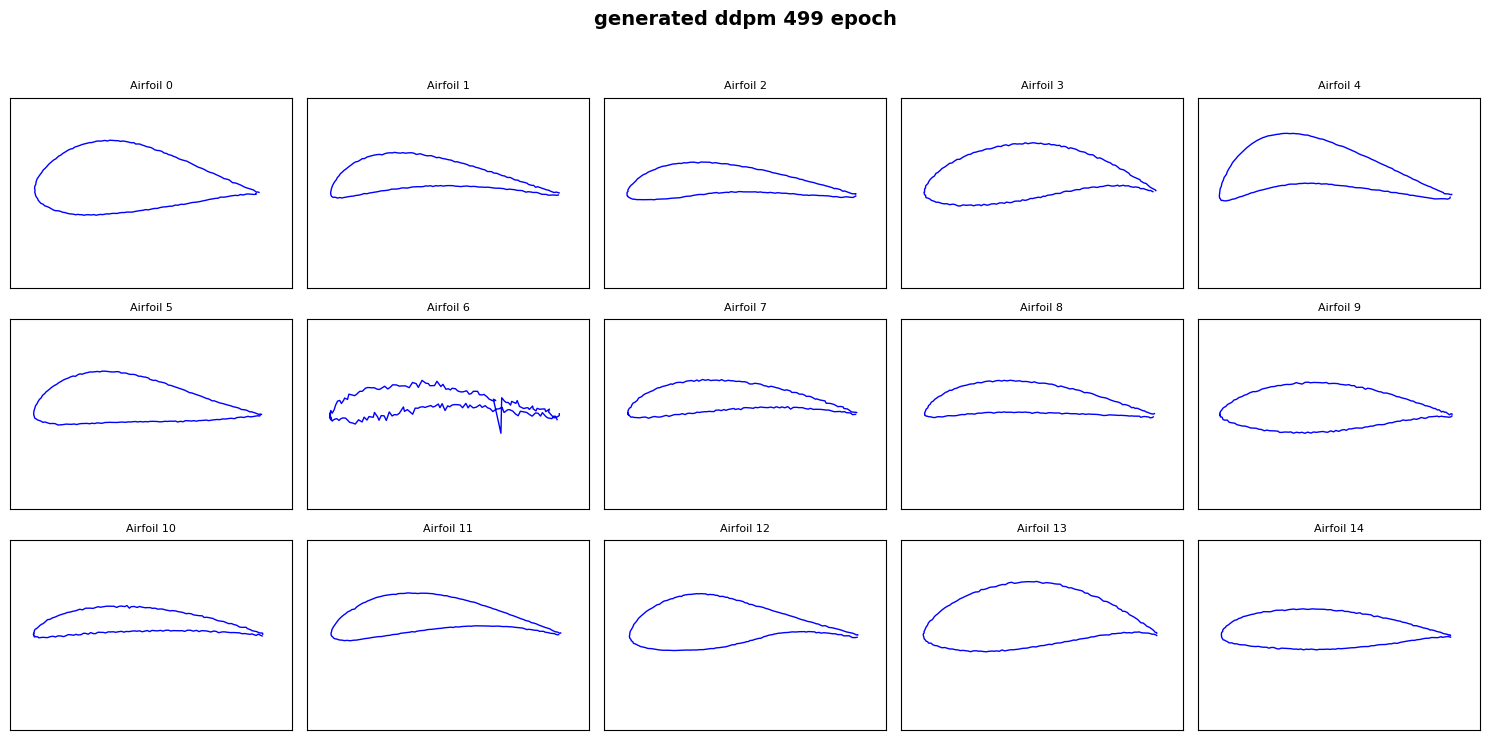

In [20]:
plot_airfoils_grid(generated_real,title="generated ddpm 499 epoch")

## DDPM with dpp  lambda = 0.1  , 125 epoch trained from ddpm without dpp loss  499 epoch

xs_test.shape=(9701, 192, 2)
xs_train.shape=(38802, 192, 2)


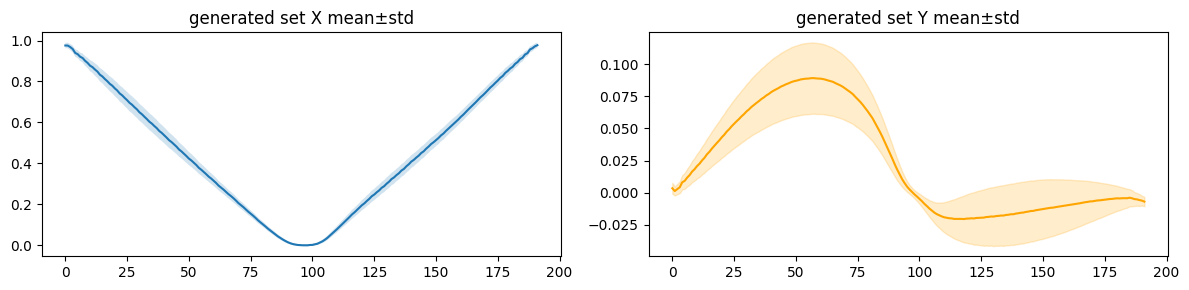

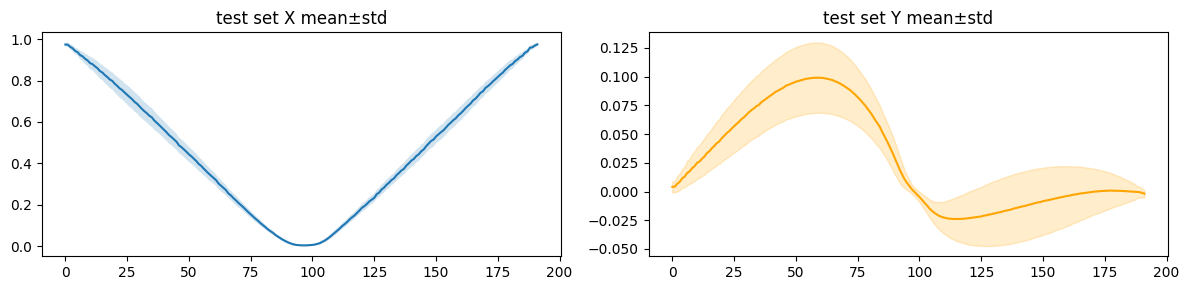

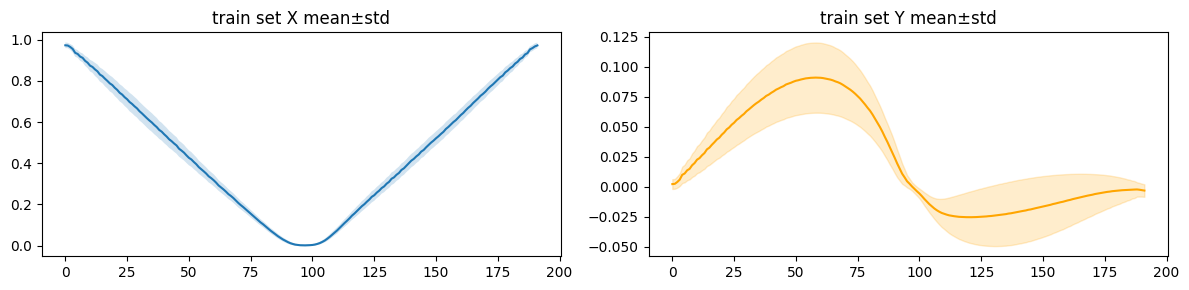

In [21]:
xs_test = np.load("/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data/raw/xs_test.npy")
xs_train = np.load("/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data/raw/xs_train.npy")
generated_real = np.load(rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/src/diffusion_notebooks/DIffusion_model_weigths_and_datas/dpp_0.1_autonorm_true_125_from_base_ddpm/datas/generated_data_dpp_0.1_autonorm_false_rmsnorm_fixed.npy")
print(f"{xs_test.shape=}")
print(f"{xs_train.shape=}")

plot_signature(generated_real, "generated set")
plot_signature(xs_test, "test set")
plot_signature(xs_train, "train set")

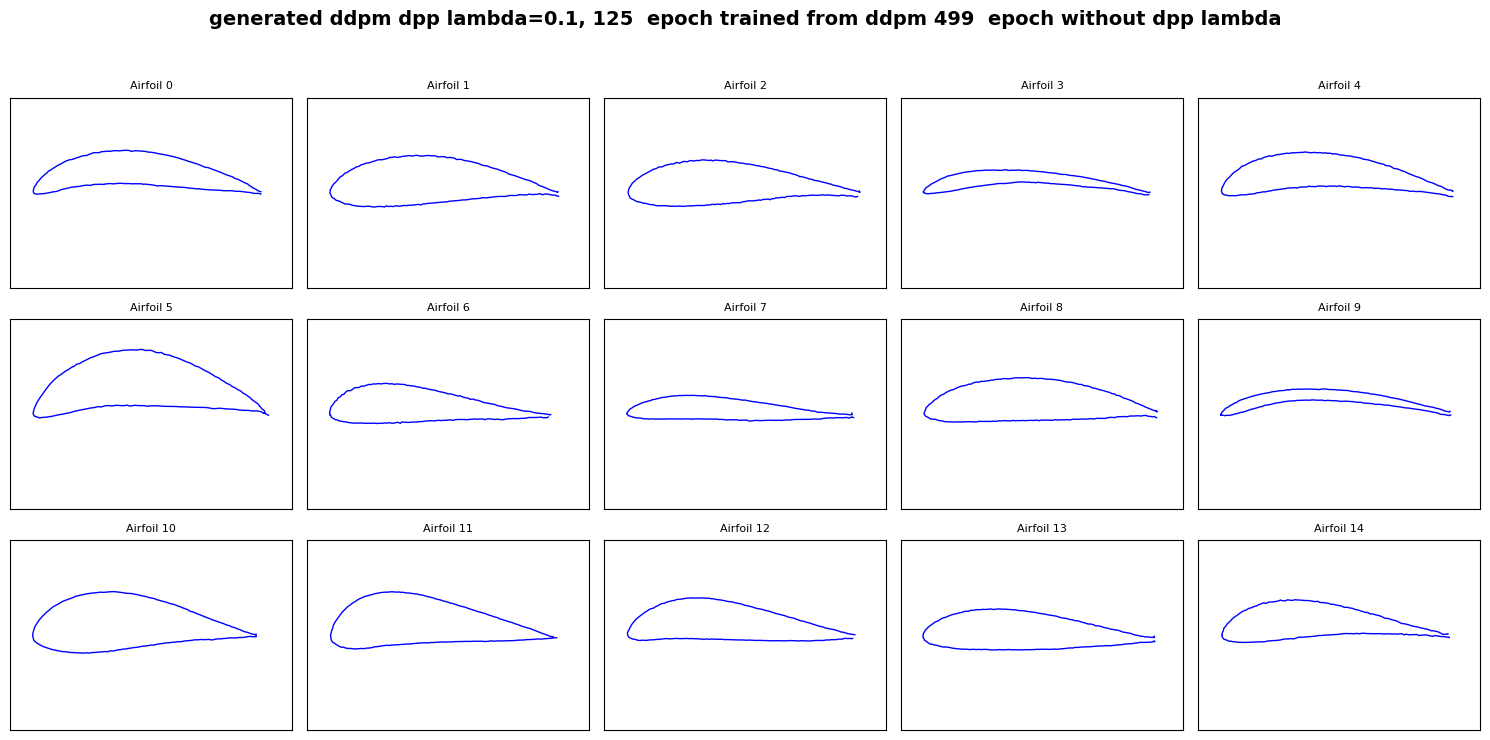

In [22]:
plot_airfoils_grid(generated_real,title="generated ddpm dpp lambda=0.1, 125  epoch trained from ddpm 499  epoch without dpp lambda")